In [25]:
from scipy.io import loadmat
import pandas as pd

mat = loadmat('mill.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}

# Parsing arrays in arrays in mat file  
data = {}
for k,v in mat.items():
    arr = v[0]
    for i in range(len(arr)):
        sub_arr = v[0][i]
        lst= []
        for sub_index in range(len(sub_arr)):
            vals = sub_arr[sub_index][0][0]
            lst.append(vals)
        data['row_{}'.format(i)] = lst
        
df = pd.DataFrame.from_dict(data, orient='index', columns=['case', 'run', 'VB',  'time', 'DOC', "feed",  "material",  "smcAC", "smcDC", "vib_table", "vib_spindle", "AE_table", "AE_spindle"])

df

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
row_162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
row_163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
row_164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
row_165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


In [26]:
df.isna().sum()

case            0
run             0
VB             21
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64

In [27]:
df.dropna(inplace = True)

In [28]:
df

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
row_0,1,1,0.00,2,1.5,0.50,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
row_3,1,4,0.11,7,1.5,0.50,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
row_5,1,6,0.20,15,1.5,0.50,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
row_6,1,7,0.24,19,1.5,0.50,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
row_7,1,8,0.29,22,1.5,0.50,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
row_159,15,6,0.56,16,1.5,0.25,2,-0.195312,1.401367,0.063477,0.285645,0.083618,0.093994
row_160,15,7,0.70,19,1.5,0.25,2,-0.683594,1.376953,0.056152,0.261230,0.102539,0.123291
row_163,16,3,0.24,3,1.5,0.50,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
row_165,16,5,0.40,6,1.5,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


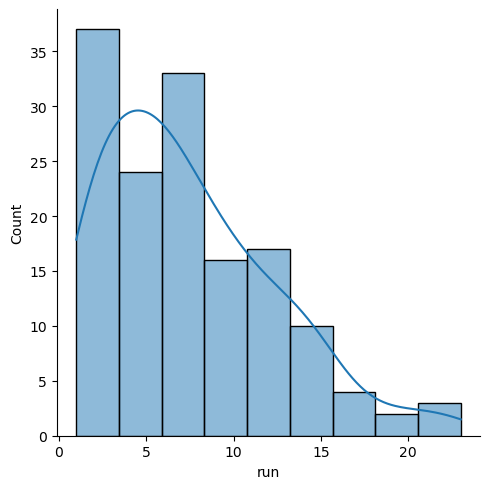

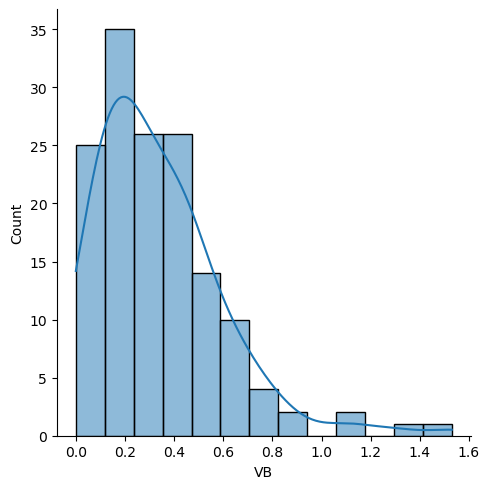

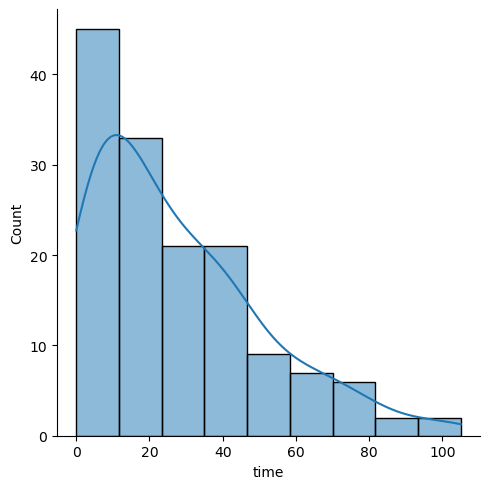

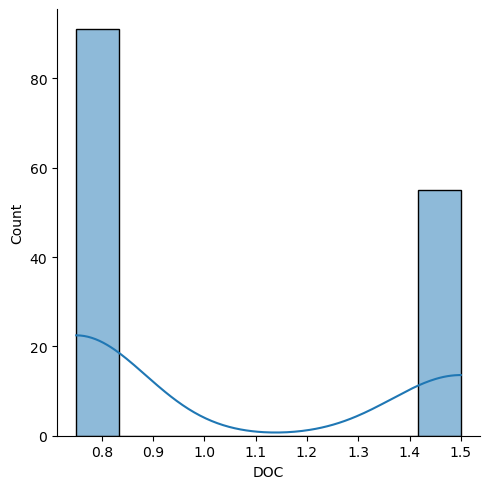

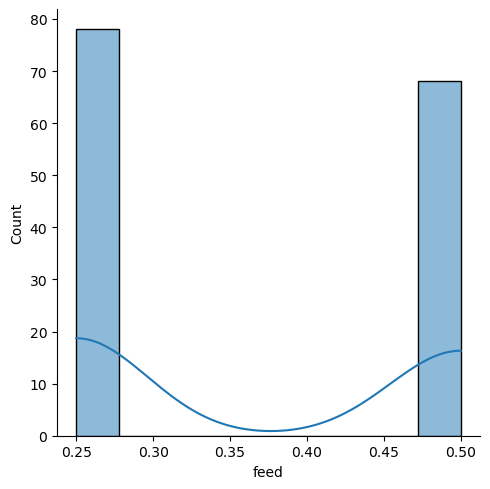

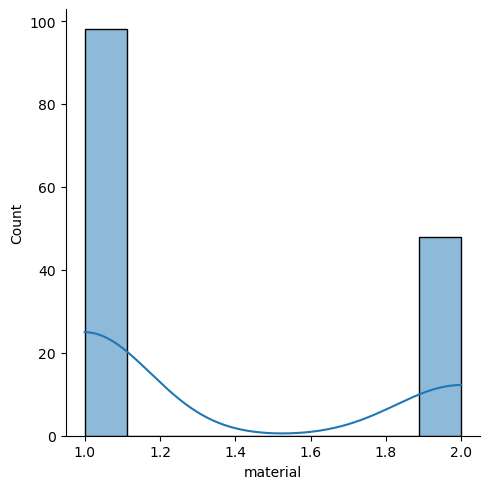

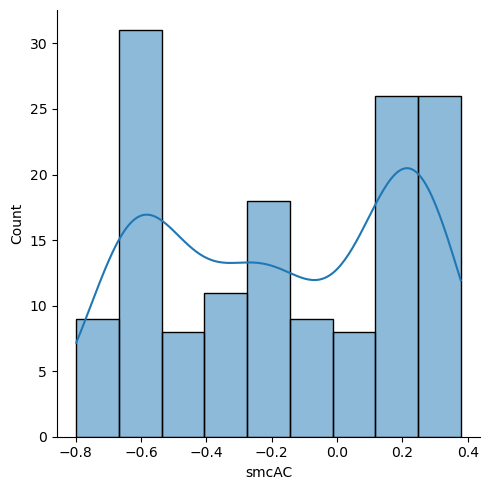

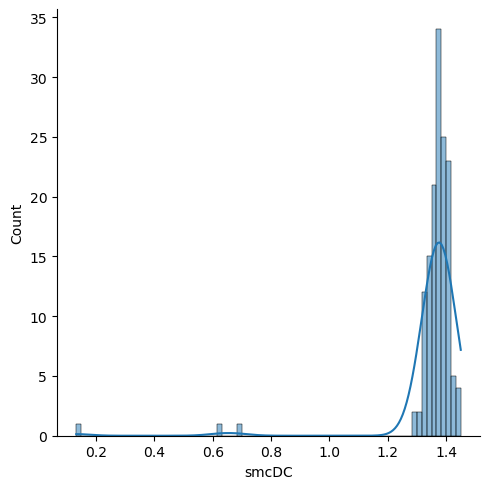

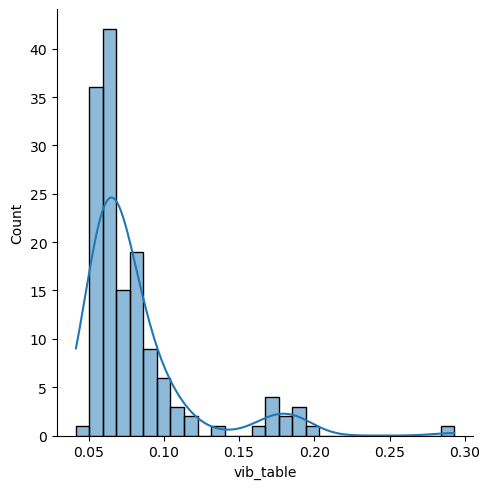

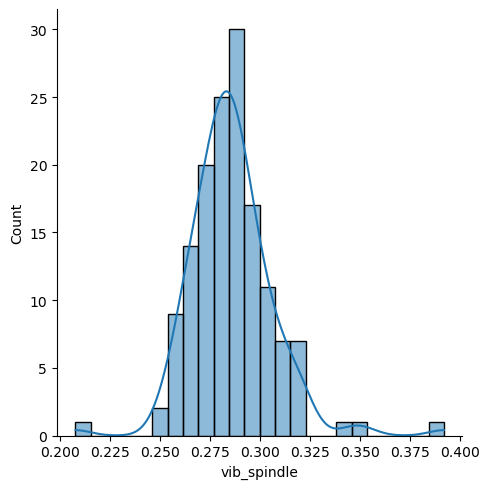

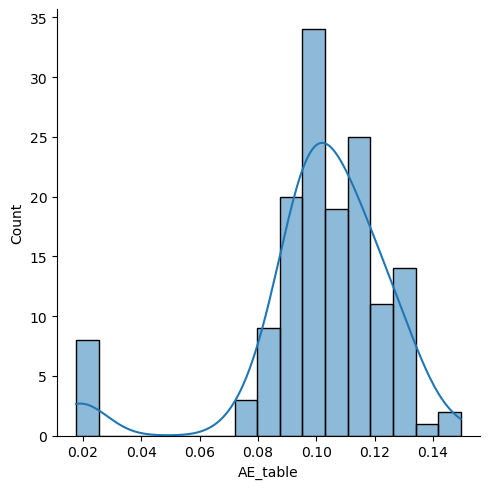

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in df.iloc[:, 1 : -1]:
    sns.displot(df[x], kde = True)
    plt.show()

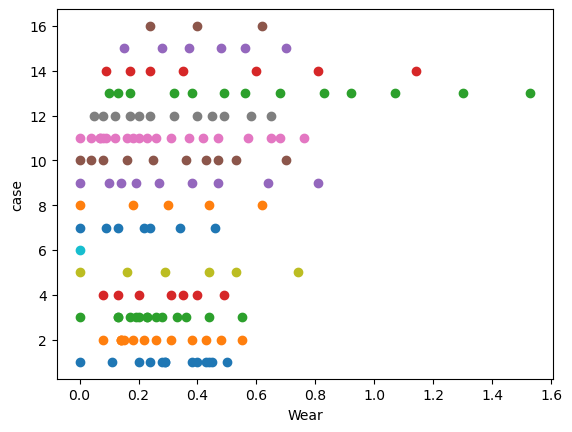

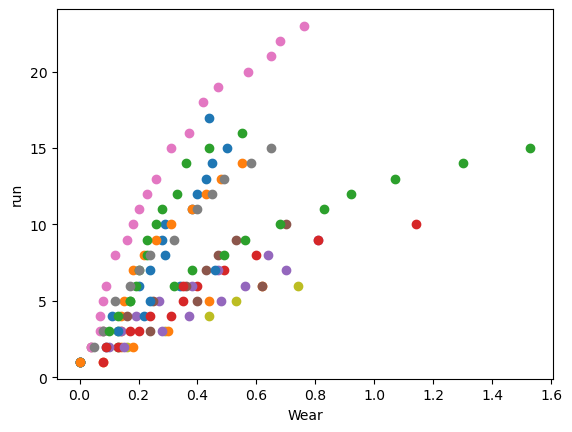

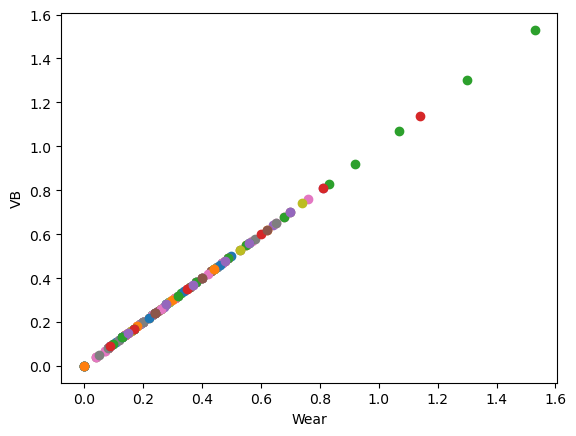

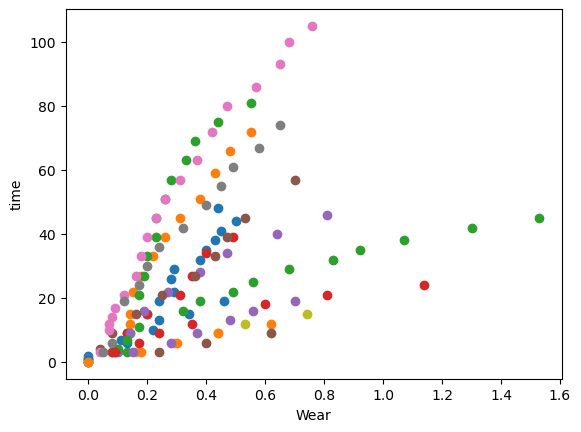

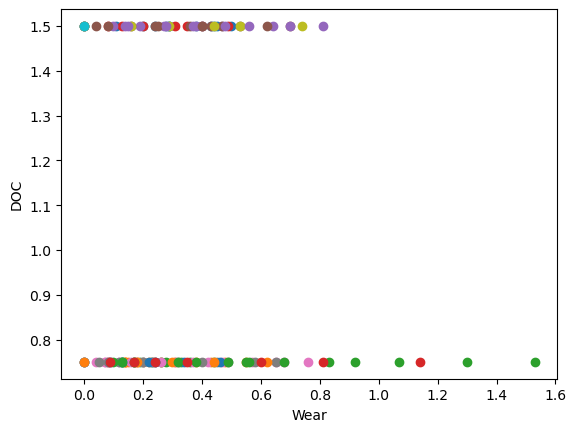

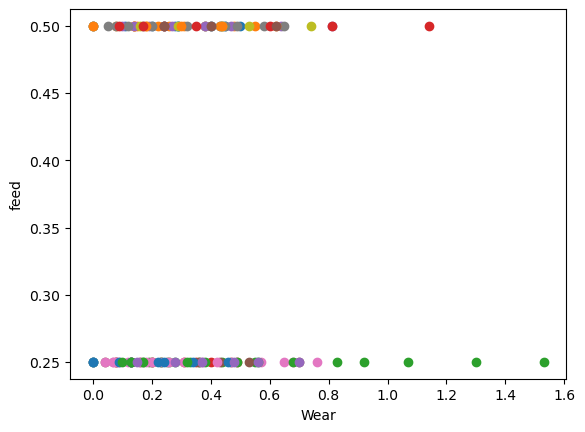

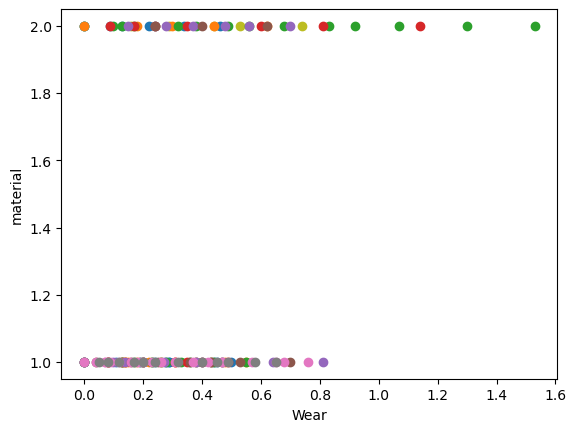

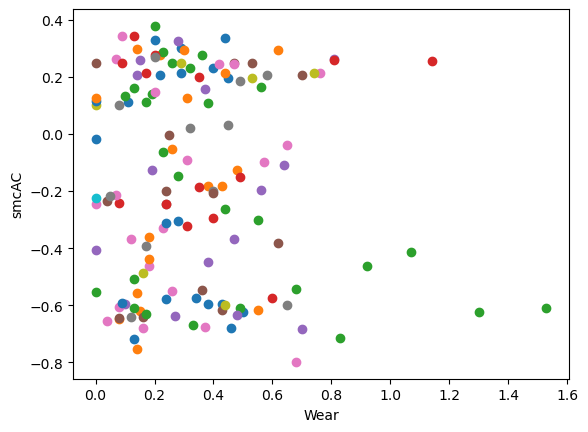

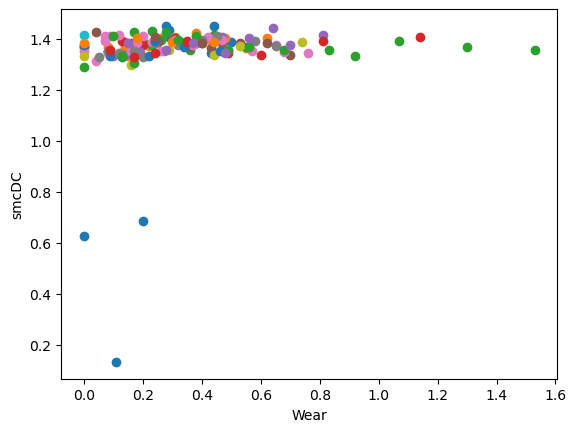

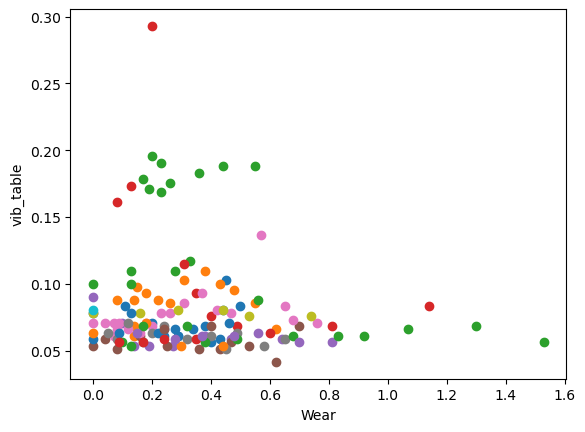

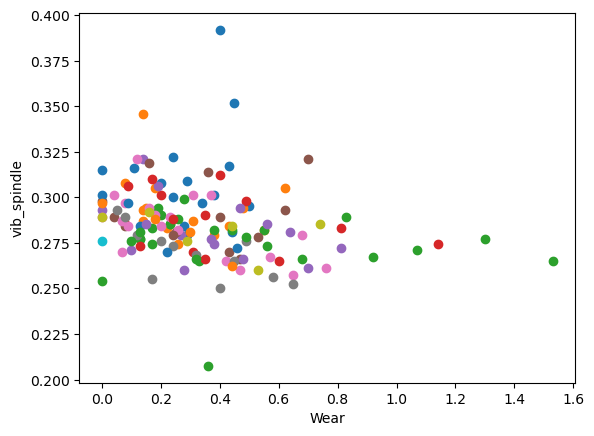

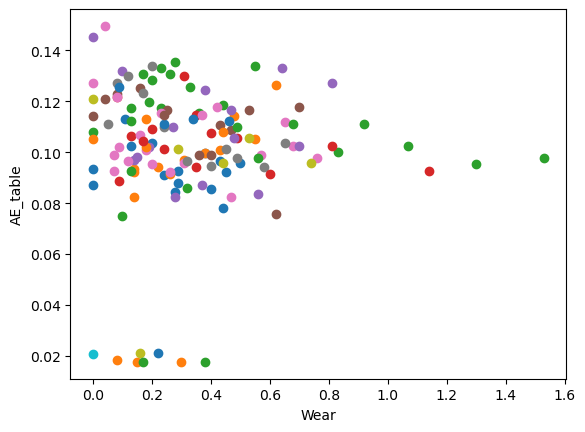

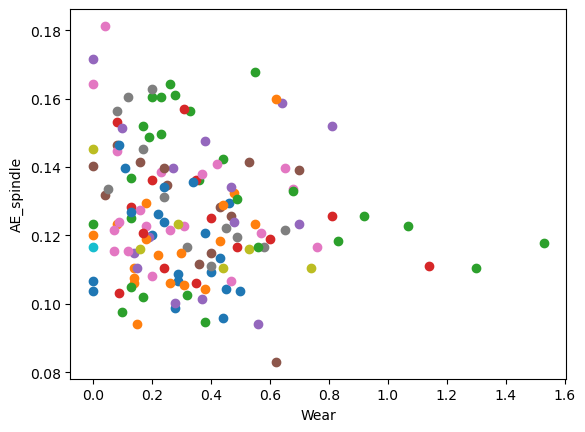

In [31]:
for x in df.columns:
    for i in df['case'].unique():
        plt.scatter('VB', x, data = df[df['case'] == i])
    plt.xlabel('Wear')
    plt.ylabel(x)
    plt.show()